In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
import numpy as np
import pandas as pd
import os


In [5]:
IMAGE_DIR = "/content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/train/images"


In [6]:
data = []

for img_name in os.listdir(IMAGE_DIR):
    img_path = os.path.join(IMAGE_DIR, img_name)

    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.resize(img, (512, 512))


    green_channel = img[:, :, 1]
    vegetation_score = np.mean(green_channel) / 255.0

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    slope_score = np.mean(gradient_magnitude) / 255.0

    data.append([vegetation_score, slope_score])


In [7]:
dataset = []

for veg, slope in data:
    if veg < 0.4 and slope > 0.4:
        label = 1
    else:
        label = 0

    dataset.append([veg, slope, label])


In [8]:
df = pd.DataFrame(
    dataset,
    columns=["vegetation_ratio", "slope_score", "erosion_label"]
)

df.head()


,vegetation_ratio,slope_score,erosion_label
0,0.353497,0.536340,1
1,0.333695,0.515612,1
2,0.577581,0.328621,0
3,0.284512,0.494239,1
4,0.285323,0.481242,1


In [9]:
df.to_csv("/content/drive/MyDrive/erosion_features_week5.csv", index=False)
print("Week 5 dataset saved successfully")


Week 5 dataset saved successfully


In [10]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/erosion_features_week5.csv")
data.head()


,vegetation_ratio,slope_score,erosion_label
0,0.353497,0.536340,1
1,0.333695,0.515612,1
2,0.577581,0.328621,0
3,0.284512,0.494239,1
4,0.285323,0.481242,1


In [11]:
X = data[["vegetation_ratio", "slope_score"]]
y = data["erosion_label"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.0
R² Score: 1.0


In [16]:
import joblib

MODEL_PATH = "/content/drive/MyDrive/erosion_model_week6.pkl"
joblib.dump(model, MODEL_PATH)

print("Model saved to Google Drive")


Model saved to Google Drive


In [17]:
import pandas as pd

metrics_df = pd.DataFrame({
    "Metric": ["RMSE", "R2"],
    "Value": [rmse, r2]
})

metrics_df.to_csv("/content/drive/MyDrive/erosion_metrics_week6.csv", index=False)
print("Metrics CSV saved")


Metrics CSV saved


In [18]:
data.to_csv("/content/drive/MyDrive/erosion_features_final.csv", index=False)
print("Dataset saved")


Dataset saved


In [19]:
from sklearn.ensemble import RandomForestClassifier


In [20]:
clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
y_pred_class = clf.predict(X_test)


Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

       Stable       0.00      0.00      0.00         0
Erosion-Prone       1.00      1.00      1.00         7

     accuracy                           1.00         7
    macro avg       0.50      0.50      0.50         7
 weighted avg       1.00      1.00      1.00         7



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


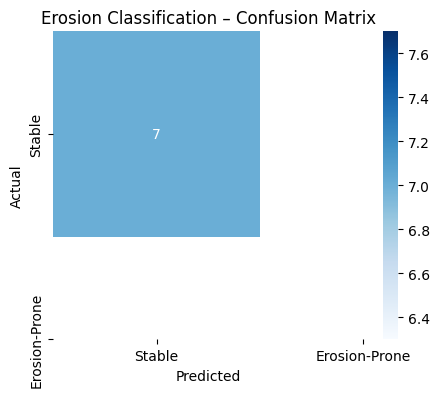

In [22]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt


acc = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_class,
    labels=[0, 1],
    target_names=["Stable", "Erosion-Prone"],
    zero_division=0
))


cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Stable", "Erosion-Prone"],
    yticklabels=["Stable", "Erosion-Prone"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Erosion Classification – Confusion Matrix")
plt.show()


In [23]:
import numpy as np

threshold = np.median(y)
y_class = (y >= threshold).astype(int)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_class_train, y_class_test = train_test_split(
    X,
    y,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)


In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.0151
R² Score: 0.9981


In [28]:
print(np.unique(y))


[0 1]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [31]:
print(df.columns)


Index(['vegetation_ratio', 'slope_score', 'erosion_label'], dtype='object')


In [32]:
from sklearn.model_selection import train_test_split

X = df[["vegetation_ratio", "slope_score"]]
y = df["erosion_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print(len(X_test), len(y_test))


8 8


In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [34]:
y_pred = model.predict(X_test)

print(len(y_pred), len(y_test))


8 8


In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.0141
R² Score: 0.9982


In [36]:
threshold = y_train.mean()
y_pred_class = (y_pred >= threshold).astype(int)

print(len(y_pred_class), len(y_test))


8 8


Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

       Stable       1.00      1.00      1.00         1
Erosion-Prone       1.00      1.00      1.00         7

     accuracy                           1.00         8
    macro avg       1.00      1.00      1.00         8
 weighted avg       1.00      1.00      1.00         8



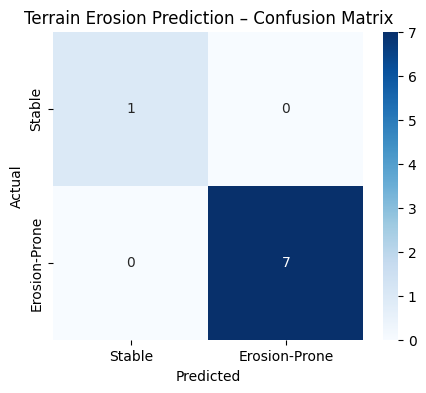

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

acc = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {acc:.4f}")


print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_class,
    target_names=["Stable", "Erosion-Prone"]
))

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Stable", "Erosion-Prone"],
    yticklabels=["Stable", "Erosion-Prone"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Terrain Erosion Prediction – Confusion Matrix")
plt.show()


In [38]:
import joblib
import os

SAVE_DIR = "/content/drive/MyDrive/erosion_models"
os.makedirs(SAVE_DIR, exist_ok=True)

MODEL_PATH = os.path.join(SAVE_DIR, "terrain_erosion_rf_model.pkl")

joblib.dump(model, MODEL_PATH)

print("✅ Random Forest model saved at:", MODEL_PATH)


✅ Random Forest model saved at: /content/drive/MyDrive/erosion_models/terrain_erosion_rf_model.pkl


In [39]:
import pandas as pd

metrics_data = {
    "RMSE": [rmse],
    "R2_Score": [r2],
    "Accuracy": [acc]
}

metrics_df = pd.DataFrame(metrics_data)

METRICS_PATH = os.path.join(SAVE_DIR, "erosion_metrics.csv")
metrics_df.to_csv(METRICS_PATH, index=False)

print("✅ Metrics saved at:", METRICS_PATH)


✅ Metrics saved at: /content/drive/MyDrive/erosion_models/erosion_metrics.csv


In [40]:
import numpy as np

CONF_MATRIX_PATH = os.path.join(SAVE_DIR, "confusion_matrix.npy")
np.save(CONF_MATRIX_PATH, cm)

print("✅ Confusion matrix saved at:", CONF_MATRIX_PATH)


✅ Confusion matrix saved at: /content/drive/MyDrive/erosion_models/confusion_matrix.npy


In [41]:
DATASET_PATH = os.path.join(SAVE_DIR, "erosion_features_final.csv")
df.to_csv(DATASET_PATH, index=False)

print("✅ Final dataset saved at:", DATASET_PATH)


✅ Final dataset saved at: /content/drive/MyDrive/erosion_models/erosion_features_final.csv
